## Classifieur Lineaire : le perceptron

Le but de ce TP est de se familiariser avec les réseaux de neurones. Dans un premier temps, nous allons nous intéressés au modèle du perceptron. Le Perceptron permet de classifier des jeu de données à condition que celui-ci soit séparable linéairement. Ce modèle est particulièrement important puisqu'il est une des briques de base des réseaux de neurones profonds.

#### <u> Jeu de données artificiel </u>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

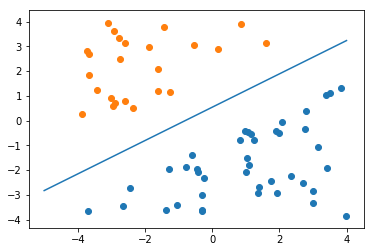

In [4]:
Ns = 100
# droite aléatoire w0 + x_1 * w_1 + x_2 w_2
w = np.random.random(size=(3))*2-1
xr = np.arange(-5,5)
# eq de la séparatrice
yr = -w[0]/w[2] - w[1]/w[2]*xr

# nuage de points
Cloud = np.random.random(size=(2,Nd))*8-4
Marge = np.matmul(Cloud.T,w[1:]) + w[0]
CPos = np.where(Marge > 1)
CNeg = np.where(Marge < -1)
plt.plot(xr,yr)
plt.scatter(Cloud[0,CPos],Cloud[1,CPos])
plt.scatter(Cloud[0,CNeg],Cloud[1,CNeg])



On va créer à la fois un jeu de données d'apprentissage, et un jeu de données test

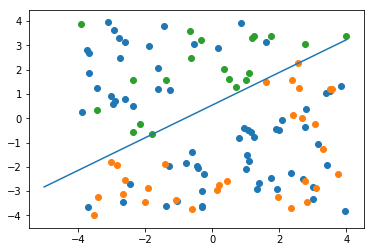

In [6]:
labels = np.zeros(Cloud.shape[1])
labels[np.where(Marge>1)] = 1

CAll = np.where(np.abs(Marge) > 1)
X = Cloud[:,CAll[0]]
y = labels[CAll[0]]

Nt = 50
Xt = np.random.random(size=(2,Nt))*8-4
yt = np.zeros(Xt.shape[1])
Marge_t = np.matmul(Xt.T,w[1:]) + w[0]
yt[np.where(Marge_t>0)] = 1

CPos_t = np.where(Marge_t > 0)
CNeg_t = np.where(Marge_t < 0)

plt.plot(xr,yr)
plt.scatter(X[0,:],X[1,:])
plt.scatter(Xt[0,CPos_t],Xt[1,CPos_t])
plt.scatter(Xt[0,CNeg_t],Xt[1,CNeg_t])

#### *Le Perceptron*
En utilisant la biblothèque ci-dessous, ajustez modèle sur le jeu de données. En particulier vous regarderez

* l'évolution de la séparatrice après chaque itération
* la courbe score (accuracy)
* la courbe de la loss

Pour chacune les deux dernières courbes, vous rajouterez les valeurs obtenues sur l'ensemble test.

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=0, hidden_layer_sizes=(), random_state=2, warm_start=True, activation='logistic', max_iter=1, learning_rate_init=0.005)


## TODO

## Autre exemple avec MNIST

Reprendre le perceptron ci-dessus avec les données MNIST. 
Comment changer le MLP pour classer toutes les catégories ?

* appliquer le l'algo du perceptron et monitorer l'apprentissage pour ${\rm lr}=0.01$ sur une centaine d'époque
* on regardera la loss et l'accuracy à la fois pour l'ensemble train et l'ensemble test
* à la fin de l'apprentissage, calculer la matrice de confusion

## Limitation du perceptron

Soit le jeu de données suivant

In [2]:
x_xor = np.zeros((1000,2))
for i in np.arange(500):
    c = np.array([0,0])
    if np.random.randint(2)<0.5:
        c = np.array([1,1])
    x_xor[i,:] = c + (np.random.uniform(0,1,size=(2))*0.2 - 0.1)
for i in np.arange(500):
    c = np.array([0,1])
    if np.random.randint(2)<0.5:
        c = np.array([1,0])
    x_xor[i+500,:] = c + (np.random.uniform(0,1,size=(2))*0.2 - 0.1)

y_xor = np.zeros(1000)
y_xor[0:500] = 0
y_xor[500:]  = 1

NameError: name 'np' is not defined